In [1]:
import sys
sys.path.insert(1, 'C:/Users/raena/Documents/Imperial College London/msc_thesis/code/functions_and_classes')

from dataRead import *
from glob import glob
import pandas as pd
import numpy as np

## Check EQW over whole period

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

def corr_heatmap(df, 
                ax,
                title = "GS1, T = 20",
                vmin = 0,
                vmax = 0.5,
                cmap = 'YlOrBr',
                cbar = False,
                xaxislabel = 'Returns Thresholds',
                yaxislabel = 'Volume Thresholds'):
    sns.heatmap(df, cmap = cmap, cbar = cbar, vmin = vmin, vmax = vmax, ax = ax)
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='both', which='major', labelsize=10, 
                    labelbottom = False, bottom=False, top = True, labeltop=True)
    ax.set_xlabel(xaxislabel, labelpad=10)
    ax.set_ylabel(yaxislabel, labelpad=10)
    ax.set_title(title, fontsize = 10, y=-0.12, weight = 'bold')
    return fig, ax

def make_DF_from_series(
    df,
    metric = 'Annual. Stand. Dev',
    statistic = ['GS1', 'GS2'],
    splitter = '_'
):
    s = df[metric]
    sIndex = list(s.index)
    sNew = {st : {} for st in statistic}
    for string in sIndex:
        stValue = s.loc[string]
        splitstr = string.split(splitter)
        st, loc1, loc2 = splitstr
        if loc1 not in sNew[st].keys():
            sNew[st][loc1] = {loc2 : stValue}
        else:
            sNew[st][loc1].update({loc2 : stValue})
    for st in statistic:
        sNew[st] = pd.DataFrame(sNew[st])
    return sNew

fp = '../../code/min_variance/'
windowOptions = [20,30,60]
mvDF = {}
for window in windowOptions:
    fname = "period_4_" + str(window)
    df = pd.read_pickle(f'{fp}/{fname}.pickle')
    mvDF[window] = df.T

fpFig = '../../code/figures'

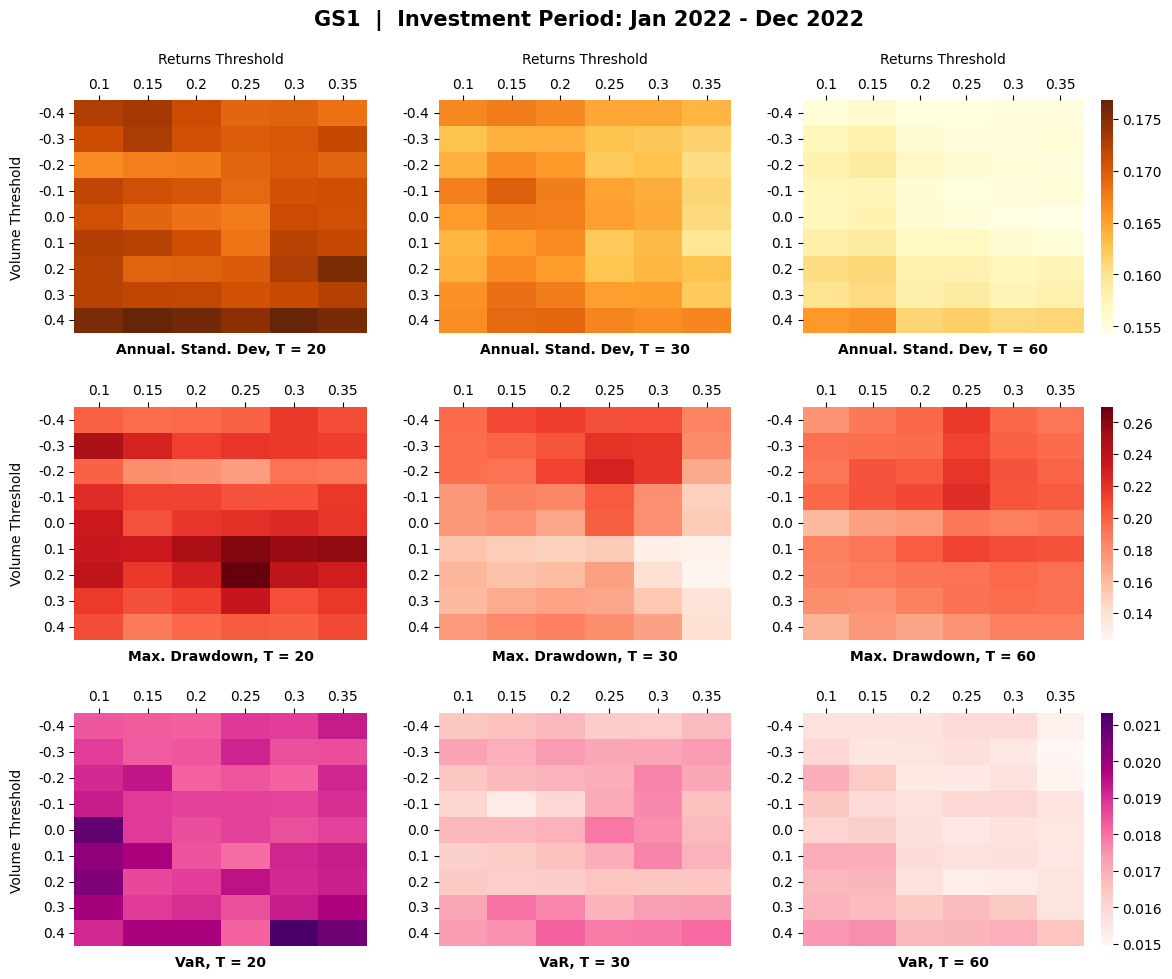

In [3]:
pStart = 'Jan 2022'
pEnd = 'Dec 2022'
fig, ax = plt.subplots(3,3,figsize=(12,10), gridspec_kw={'width_ratios': [1, 1, 1.2]})
metric_list = ['Annual. Stand. Dev', 'Max. Drawdown', 'VaR']
st = 'GS1'
cmapList = ['YlOrBr', 'Reds', 'RdPu']
for j, metric in enumerate(metric_list):
    mult = 1 if metric not in ['Max. Drawdown','VaR'] else -1
    vmin = np.min([np.min(mult*make_DF_from_series(mvDF[T], metric = metric)[st]) for T in windowOptions])
    vmax = np.max([np.max(mult*make_DF_from_series(mvDF[T], metric = metric)[st]) for T in windowOptions])
    cmap = cmapList[j]
    for i, window in enumerate(windowOptions):
        cbar = i == 2
        df = mult*make_DF_from_series(mvDF[window], metric = metric)[st]
        title = f'{metric}, T = {window}'
        xaxislabel = '' if j != 0 else 'Returns Threshold'
        yaxislabel = '' if i != 0 else 'Volume Threshold'
        corr_heatmap(df = df, ax = ax[j,i], title = title, vmin = vmin, vmax = vmax, 
                    cbar = cbar, cmap = cmap, xaxislabel = xaxislabel, yaxislabel = yaxislabel)

plt.suptitle(f'{st}  |  Investment Period: {pStart} - {pEnd}', fontsize = 15, weight = 'bold')
fig.tight_layout(pad = 1.5, h_pad = 2.0, w_pad = 2.5)
plt.savefig(f'{fpFig}/{st}_min_var_heatmaps.pdf', bbox_inches='tight')

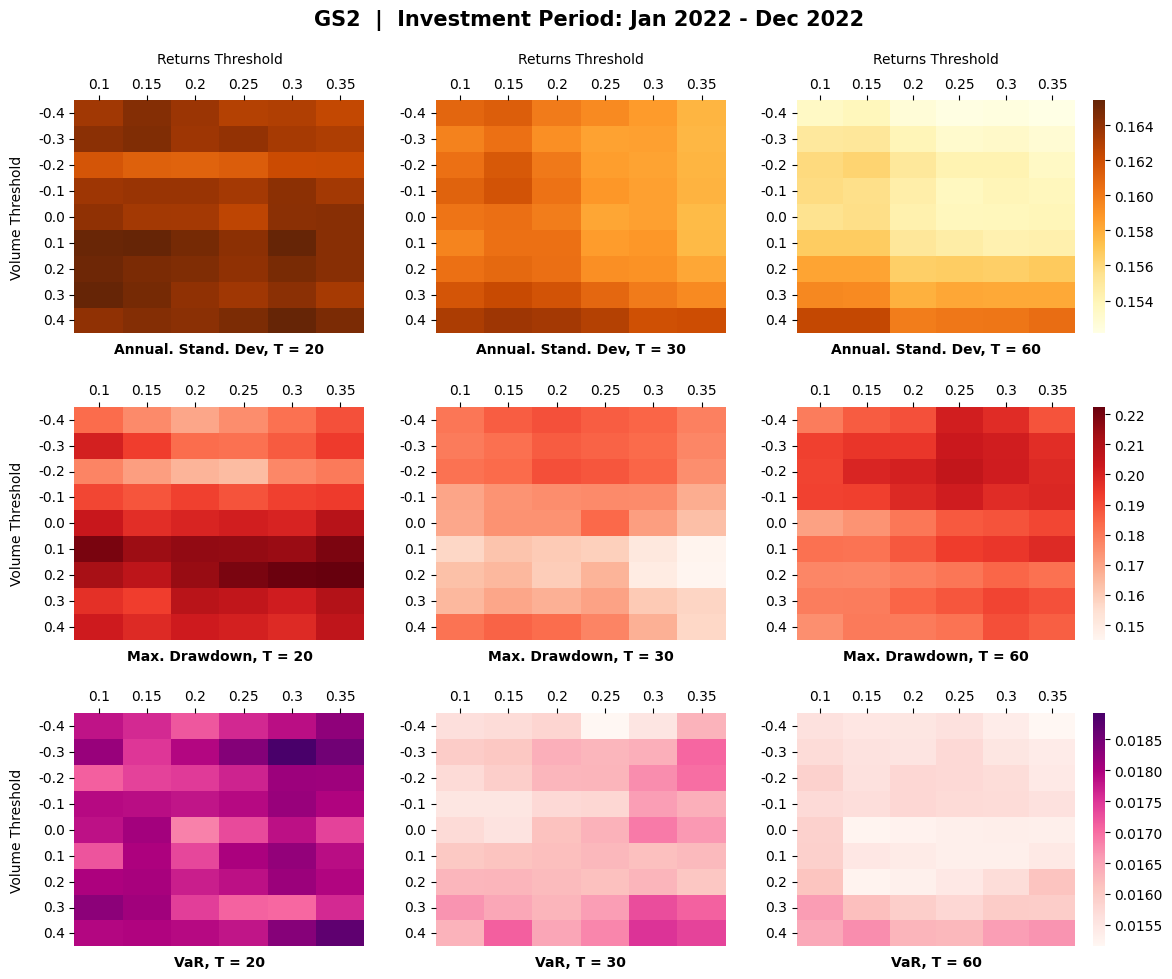

In [4]:
pStart = 'Jan 2022'
pEnd = 'Dec 2022'
fig, ax = plt.subplots(3,3,figsize=(12,10), gridspec_kw={'width_ratios': [1, 1, 1.2]})
metric_list = ['Annual. Stand. Dev', 'Max. Drawdown', 'VaR']
st = 'GS2'
cmapList = ['YlOrBr', 'Reds', 'RdPu']
for j, metric in enumerate(metric_list):
    mult = 1 if metric not in ['Max. Drawdown','VaR'] else -1
    vmin = np.min([np.min(mult*make_DF_from_series(mvDF[T], metric = metric)[st]) for T in windowOptions])
    vmax = np.max([np.max(mult*make_DF_from_series(mvDF[T], metric = metric)[st]) for T in windowOptions])
    cmap = cmapList[j]
    for i, window in enumerate(windowOptions):
        cbar = i == 2
        df = mult*make_DF_from_series(mvDF[window], metric = metric)[st]
        title = f'{metric}, T = {window}'
        xaxislabel = '' if j != 0 else 'Returns Threshold'
        yaxislabel = '' if i != 0 else 'Volume Threshold'
        corr_heatmap(df = df, ax = ax[j,i], title = title, vmin = vmin, vmax = vmax, 
                    cbar = cbar, cmap = cmap, xaxislabel = xaxislabel, yaxislabel = yaxislabel)

plt.suptitle(f'{st}  |  Investment Period: {pStart} - {pEnd}', fontsize = 15, weight = 'bold')
fig.tight_layout(pad = 1.5, h_pad = 2.0, w_pad = 2.5)
plt.savefig(f'{fpFig}/{st}_min_var_heatmaps.pdf', bbox_inches='tight')

In [5]:
make_DF_from_series(mvDF[20], metric = 'Annual. Stand. Dev')['GS1']

,0.1,0.15,0.2,0.25,0.3,0.35
-0.4,0.172583,0.173344,0.171247,0.169177,0.169474,0.168211
-0.3,0.171129,0.172949,0.170857,0.169795,0.170262,0.171516
-0.2,0.166442,0.167326,0.167462,0.169166,0.170035,0.169251
-0.1,0.171881,0.170876,0.170396,0.168918,0.170653,0.170911
0.0,0.170823,0.169190,0.168252,0.167498,0.171221,0.170833
0.1,0.172620,0.172343,0.170965,0.168067,0.172364,0.171592
0.2,0.172326,0.169313,0.169576,0.169940,0.172820,0.175507
0.3,0.172395,0.171859,0.171783,0.170646,0.171383,0.172477
0.4,0.175703,0.176728,0.176182,0.174657,0.176793,0.175807


In [6]:
mvDF[60]['Annual. Stand. Dev'].sort_values()

GS2_0.35_-0.4    0.152124
GS2_0.25_-0.4    0.152276
GS2_0.3_-0.4     0.152407
GS2_0.2_-0.4     0.152719
GS2_0.35_-0.3    0.152871
                   ...   
GS1_0.25_0.4     0.161697
GS2_0.1_0.4      0.162322
GS2_0.15_0.4     0.162327
GS1_0.1_0.4      0.165556
GS1_0.15_0.4     0.166146
Name: Annual. Stand. Dev, Length: 108, dtype: float64

In [7]:
make_DF_from_series(mvDF[60], metric = 'Annual. Stand. Dev')['GS1']

,0.1,0.15,0.2,0.25,0.3,0.35
-0.4,0.155262,0.155965,0.154754,0.154826,0.154944,0.154855
-0.3,0.157337,0.157993,0.155534,0.154919,0.154892,0.155380
-0.2,0.157953,0.158846,0.156658,0.155510,0.155172,0.154931
-0.1,0.157359,0.157413,0.155700,0.154712,0.155017,0.155269
0.0,0.157105,0.157733,0.155526,0.155173,0.154559,0.154303
0.1,0.158466,0.158791,0.156860,0.156932,0.155624,0.155125
0.2,0.160560,0.161054,0.158010,0.157907,0.157014,0.157543
0.3,0.159948,0.160643,0.158216,0.158794,0.157616,0.157845
0.4,0.165556,0.166146,0.161219,0.161697,0.160831,0.161144


In [32]:
a = mvDF[20]['Annual. Stand. Dev']
a = a.loc[a.index.str.contains('GS1')].idxmin()
a.split('_')[1]

'0.1'

In [43]:
gstats = ['GS1', 'GS2']
print_df = pd.DataFrame(columns = ['c_r',  'c_v'] + metric_list)
for window in windowOptions:
    ser = mvDF[window]['Annual. Stand. Dev']
    for st in gstats:
        stser = ser.loc[ser.index.str.contains(st)]
        min_dev = stser.idxmin()
        ret_loc = min_dev.split('_')[1]
        vol_loc = min_dev.split('_')[2]
        temp_metric_results = []
        for metric in metric_list:
            df = make_DF_from_series(mvDF[window], metric = metric)[st]
            temp_metric = df.loc[vol_loc, ret_loc]
            temp_metric_results.append(temp_metric)
        print_df.loc[r'$N =$' + f' {window}, {st}'] = [ret_loc, vol_loc] + temp_metric_results

pRes1 = print_df
pRes1 = pRes1.style.format(precision = 4)
print(pRes1.to_latex())

\begin{tabular}{lllrrr}
 & c_r & c_v & Annual. Stand. Dev & Max. Drawdown & VaR \\
$N =$ 20, GS1 & 0.1 & -0.2 & 0.1664 & -0.1994 & -0.0191 \\
$N =$ 20, GS2 & 0.2 & -0.2 & 0.1610 & -0.1662 & -0.0175 \\
$N =$ 30, GS1 & 0.35 & 0.1 & 0.1595 & -0.1258 & -0.0169 \\
$N =$ 30, GS2 & 0.35 & 0.0 & 0.1574 & -0.1635 & -0.0166 \\
$N =$ 60, GS1 & 0.35 & 0.0 & 0.1543 & -0.1896 & -0.0155 \\
$N =$ 60, GS2 & 0.35 & -0.4 & 0.1521 & -0.1885 & -0.0152 \\
\end{tabular}



In [8]:
print(np.min(make_DF_from_series(mvDF[20], metric = 'Annual. Stand. Dev')['GS1']))
print(np.min(make_DF_from_series(mvDF[30], metric = 'Annual. Stand. Dev')['GS1']))
print(np.min(make_DF_from_series(mvDF[60], metric = 'Annual. Stand. Dev')['GS1']))

0.16644229036124486
0.15950901908574242
0.15430293556850463


In [9]:
print(np.min(make_DF_from_series(mvDF[20], metric = 'Annual. Stand. Dev')['GS2']))
print(np.min(make_DF_from_series(mvDF[30], metric = 'Annual. Stand. Dev')['GS2']))
print(np.min(make_DF_from_series(mvDF[60], metric = 'Annual. Stand. Dev')['GS2']))

0.16101409737686947
0.15744971943272584
0.1521236482773562
